In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [101]:
df = pd.read_csv('wholesale_customers_data.csv')
df_1 = pd.read_csv('data1.csv')
df_2 = pd.read_csv('data2.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [163]:
from sklearn.preprocessing import StandardScaler
scaled_df=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


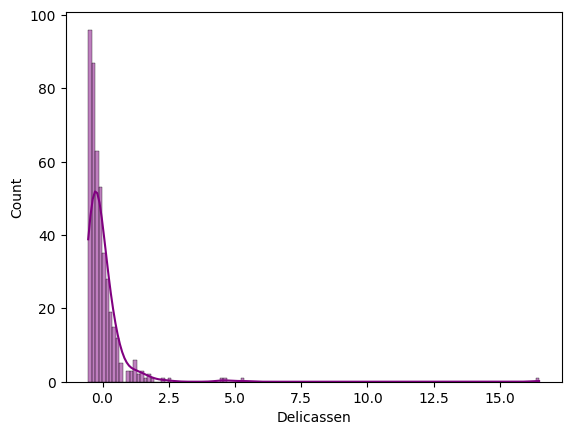

In [165]:
temp = sns.histplot(getattr(scaled_df, 'Delicassen'), kde=True, color='purple')

In [102]:
df_1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,2,3,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,2,3,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,1,3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,2,3,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


In [103]:
df_2.head()

,Channel_2,Channel_1,Region_3,Region_1,Region_2,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,0,1,0,0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,1,0,1,0,0,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,1,0,1,0,0,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,0,1,1,0,0,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,1,0,1,0,0,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


In [166]:
res, score = [], []
for i in range(2,11):
    km = KMeans(n_clusters=i, n_init= 'auto')
    km.fit_predict(scaled_df)
    score.append(silhouette_score(scaled_df, km.labels_, metric='euclidean'))
    res.append(km.inertia_)

In [167]:
score

[0.37289399049875543,
 0.3567685389017652,
 0.3598744628154799,
 0.33795277932685336,
 0.35695539661224596,
 0.35421817711002984,
 0.36368529042778336,
 0.32655603936714717,
 0.3633745278320742]

<Axes: >

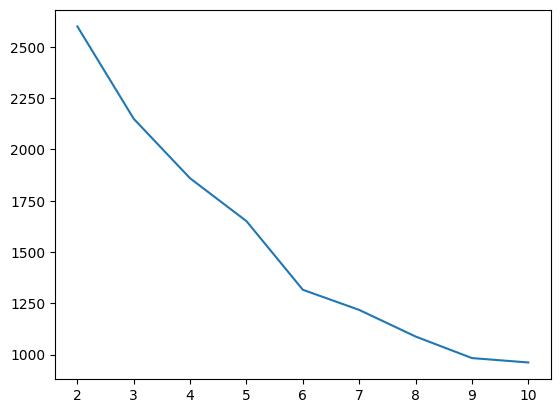

In [169]:
x = [i for i in range(2,11)]
sns.lineplot(x=x, y=res)